In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install yfinance


In [ ]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso
import yfinance as yf

In [ ]:
import yfinance as yf

ticker_symbol = "RELIANCE.NS"

data = yf.download(ticker_symbol, start="2020-01-01", end="2024-06-01")



[*********************100%***********************]  1 of 1 completed


In [ ]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,1387.957031,1396.277466,1376.527954,1380.276611,1356.042603,7002234
2020-01-02,1382.471069,1408.941040,1382.471069,1403.775024,1379.128662,8855158
2020-01-03,1401.671997,1409.581055,1392.528687,1405.466553,1380.790405,10492349
2020-01-06,1389.785767,1397.008911,1369.670410,1372.870605,1348.766724,12259588
2020-01-07,1388.871338,1403.043579,1383.842529,1393.991699,1369.517212,8341811


In [ ]:
data.shape

(1093, 6)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1093 entries, 2020-01-01 to 2024-05-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1093 non-null   float64
 1   High       1093 non-null   float64
 2   Low        1093 non-null   float64
 3   Close      1093 non-null   float64
 4   Adj Close  1093 non-null   float64
 5   Volume     1093 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 59.8 KB


In [ ]:
data.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [ ]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1.093000e+03
mean,2147.927852,2170.253796,2124.523739,2146.498258,2127.095572,1.010181e+07
std,421.793703,422.148388,422.057092,422.511195,425.803221,8.408915e+06
min,837.711609,868.616089,800.635437,808.315857,794.124023,8.528280e+05
25%,1919.608521,1934.561157,1886.057495,1916.931885,1893.557373,5.154595e+06
50%,2228.121094,2242.889160,2193.924072,2220.552734,2200.318604,7.296346e+06
75%,2391.600098,2411.949951,2372.109131,2394.300049,2376.250977,1.165052e+07
max,3011.550049,3024.899902,2974.449951,3014.800049,3004.602539,7.134168e+07


<Axes: >

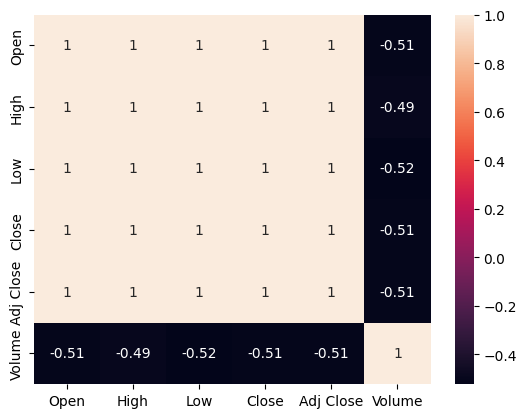

In [ ]:
sns.heatmap(data.corr(), annot=True)

<Axes: >

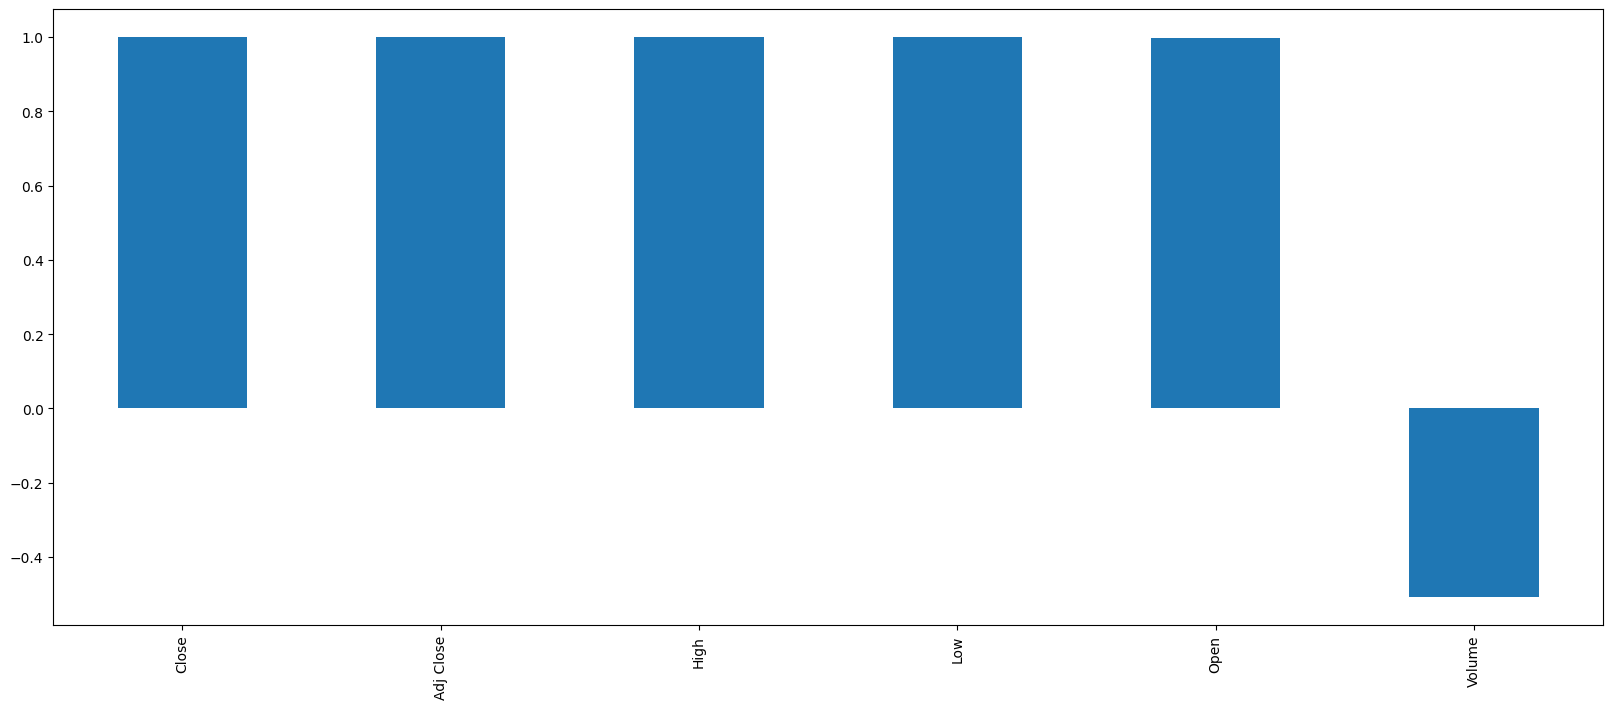

In [ ]:
plt.figure(figsize=(20,8))
data.corr()['Close'].sort_values(ascending=False).plot(kind='bar')

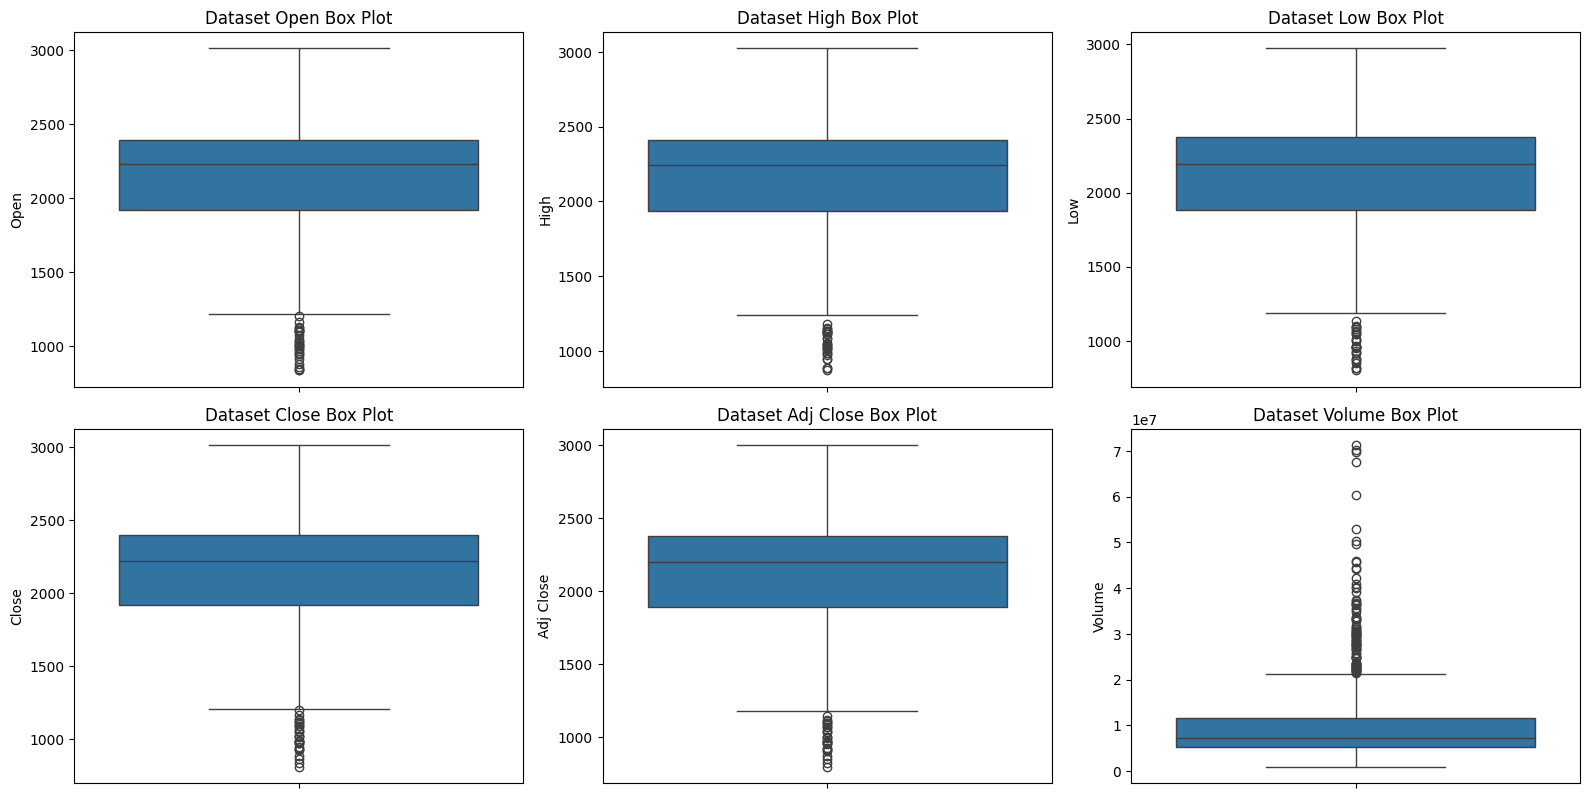

In [ ]:
plt.figure(figsize=(16, 12))

for i, df in enumerate(data):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data[df])
    plt.title(f'Dataset {df} Box Plot')

plt.tight_layout()
plt.show()

In [ ]:
# for column in data:
#     Q1 = data[column].quantile(0.25)
#     Q3 = data[column].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR

#     outliers = (data[column] < lower_bound) | (data[column] > upper_bound)
#     data.loc[outliers, column] = np.nan

#     data[column].fillna(data[column].mean(), inplace=True)


In [ ]:
def remove_outliers(df):
    df_cleaned = df.copy()
    for column in df.columns:
        Q1 = df_cleaned[column].quantile(0.25)
        Q3 = df_cleaned[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Remove outliers
        df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]

    return df_cleaned

In [ ]:
data_cleaned = remove_outliers(data)


In [ ]:
data_cleaned.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,1387.957031,1396.277466,1376.527954,1380.276611,1356.042603,7002234
2020-01-02,1382.471069,1408.941040,1382.471069,1403.775024,1379.128662,8855158
2020-01-03,1401.671997,1409.581055,1392.528687,1405.466553,1380.790405,10492349
2020-01-06,1389.785767,1397.008911,1369.670410,1372.870605,1348.766724,12259588
2020-01-07,1388.871338,1403.043579,1383.842529,1393.991699,1369.517212,8341811


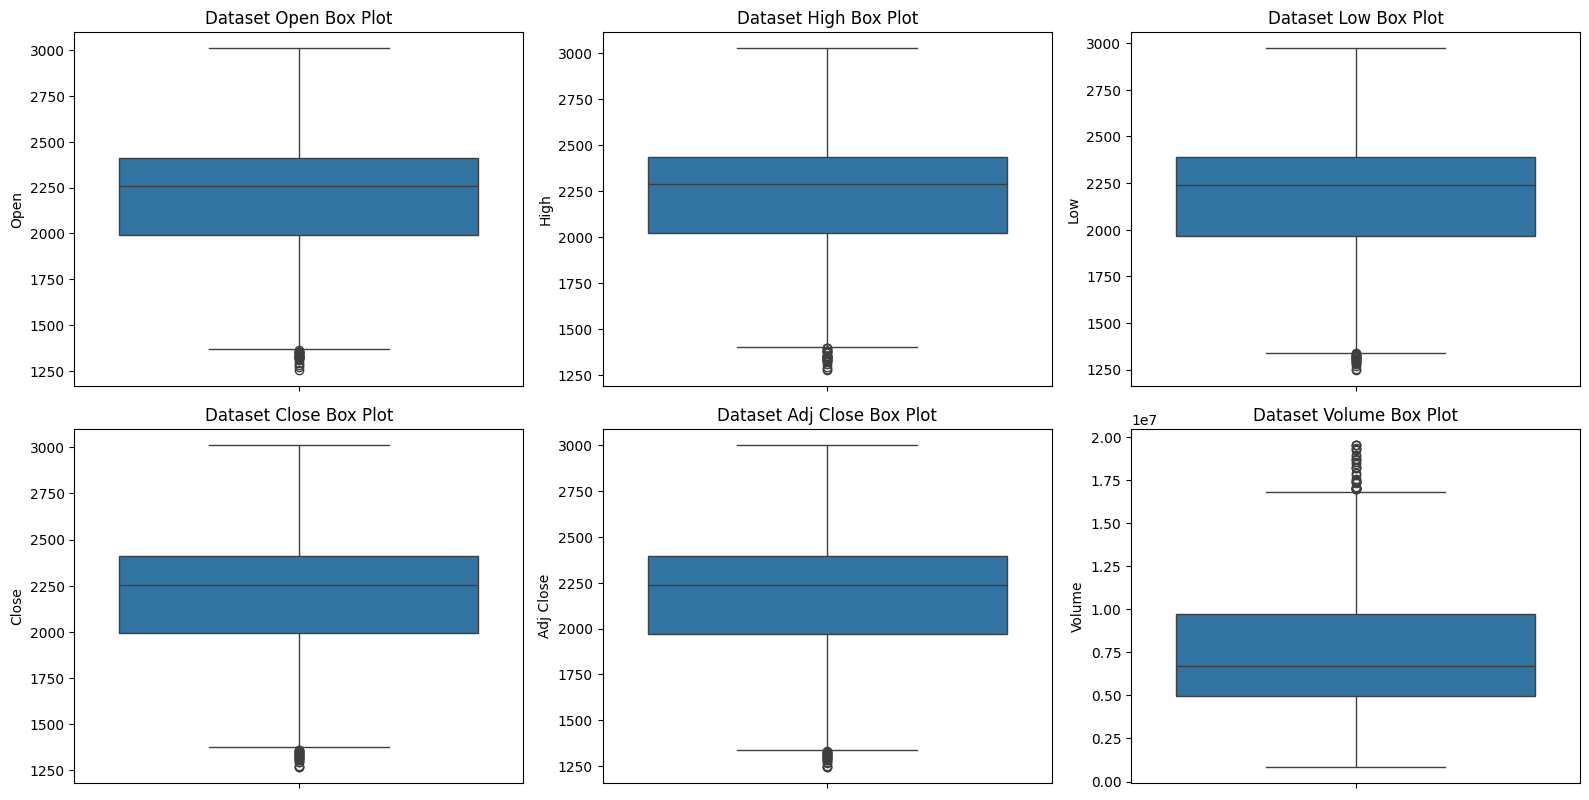

In [ ]:
plt.figure(figsize=(16, 12))

for i, df in enumerate(data_cleaned):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data_cleaned[df])
    plt.title(f'Dataset {df} Box Plot')

plt.tight_layout()
plt.show()

In [ ]:
X = data_cleaned[['Open', 'High', 'Low', 'Volume']]
y = data_cleaned['Close']

In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
X_scaled

array([[0.07698247, 0.06962599, 0.07536689, 0.32829816],
       [0.07386368, 0.07686024, 0.07880586, 0.42722016],
       [0.08477947, 0.07722585, 0.08462567, 0.51462483],
       ...,
       [0.93260394, 0.93778936, 0.94355294, 0.15156294],
       [0.92009687, 0.91768088, 0.92231661, 0.30700717],
       [0.9153215 , 0.91979453, 0.92480482, 0.7838322 ]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
model.score(X_train, y_train)

0.9991619256638801

In [ ]:
model.score(X_test, y_test)

0.999242031193825

In [ ]:
y_pred = model.predict(X_test)


In [ ]:

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 84.33929349440696


In [ ]:

def predict_stock_price(open_price, high_price, low_price, volume):
    input_data = pd.DataFrame([[open_price, high_price, low_price, volume]], columns=['Open', 'High', 'Low', 'Volume'])

    input_data_scaled = scaler.transform(input_data)
    predicted_price = model.predict(input_data_scaled)
    return predicted_price[0]

if __name__ == "__main__":
    open_price = float(input("Enter the open Price: ").replace(',', ''))
    high_price = float(input("Enter the High Price: ").replace(',', ''))
    low_price = float(input("Enter the Low Price: ").replace(',', ''))
    volume = float(input("Enter the Volume: ").replace(',', ''))

    predicted_price = predict_stock_price(open_price, high_price, low_price, volume)
    print(f"Predicted Stock Price: {predicted_price:.2f}")

Enter the open Price: 3,006.20
Enter the High Price: 3,074.00
Enter the Low Price: 2,988.00 
Enter the Volume: 19,116,670
Predicted Stock Price: 3045.05


In [ ]:

from sklearn.ensemble import RandomForestRegressor,StackingRegressor,GradientBoostingRegressor


In [ ]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
rf_model.score(X_train, y_train)

0.9997528373317864

In [ ]:
rf_model.score(X_test, y_test)

0.9980033938025579

In [ ]:
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest Regression MSE: {mse_rf}")

Random Forest Regression MSE: 222.16264667750593


In [ ]:
results_df = pd.DataFrame({
    'Actual': y_test,
    'Linear Regression': y_pred,
    'Random Forest': y_pred_rf
}).reset_index()


In [ ]:
results_df

,Date,Actual,Linear Regression,Random Forest
0,2021-02-12,1884.396118,1883.975703,1883.121947
1,2023-11-09,2310.550049,2309.137828,2319.462341
2,2020-08-24,1934.376587,1923.670258,1926.075131
3,2020-08-14,1951.036743,1959.842012,1966.693547
4,2020-09-17,2121.745605,2129.686933,2132.038816
...,...,...,...,...
190,2024-05-24,2960.500000,2960.807254,2944.614978
191,2023-01-11,2331.635742,2335.564921,2343.598013
192,2022-09-22,2294.669434,2295.843614,2300.967659
193,2020-02-17,1351.612305,1363.649461,1369.159736


**Stacking**

In [ ]:
base_models = [
    ('linear', LinearRegression()),
    ('ridge', Ridge()),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('gbr', GradientBoostingRegressor(n_estimators=100, random_state=42))
]
#meta model
meta_model = LinearRegression()

stacking_model = StackingRegressor(estimators=base_models, final_estimator=meta_model, cv=5)

stacking_model.fit(X_train, y_train)

StackingRegressor(cv=5,
                  estimators=[('linear', LinearRegression()),
                              ('ridge', Ridge()),
                              ('rf', RandomForestRegressor(random_state=42)),
                              ('gbr',
                               GradientBoostingRegressor(random_state=42))],
                  final_estimator=LinearRegression())

In [ ]:
y_pred_stacking = stacking_model.predict(X_test)
mse_stacking = mean_squared_error(y_test, y_pred_stacking)
print(f"Stacking Model MSE: {mse_stacking}")

Stacking Model MSE: 85.28755868925211


In [ ]:
results_df = pd.DataFrame({
    'Actual': y_test,
    'Stacking Prediction': y_pred_stacking
}).reset_index()

In [ ]:
results_df.head()

,Date,Actual,Stacking Prediction
0,2021-02-12,1884.396118,1884.752684
1,2023-11-09,2310.550049,2309.918094
2,2020-08-24,1934.376587,1924.135944
3,2020-08-14,1951.036743,1959.405333
4,2020-09-17,2121.745605,2131.288916


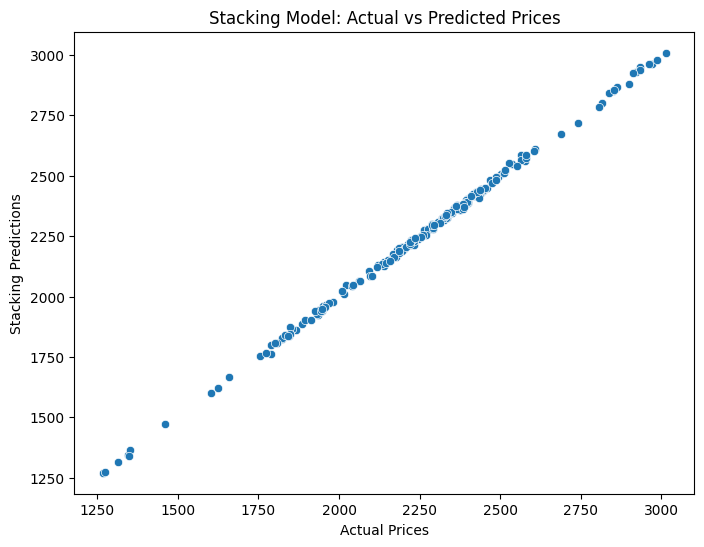

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=results_df['Actual'], y=results_df['Stacking Prediction'])
plt.xlabel('Actual Prices')
plt.ylabel('Stacking Predictions')
plt.title('Stacking Model: Actual vs Predicted Prices')
plt.show()

In [ ]:
def predict_stock_price(open_price, high_price, low_price, volume):
    input_data = pd.DataFrame([[open_price, high_price, low_price, volume]], columns=['Open', 'High', 'Low', 'Volume'])

    input_data_scaled = scaler.transform(input_data)
    predicted_price = stacking_model.predict(input_data_scaled)
    return predicted_price[0]

if __name__ == "__main__":
    open_price = float(input("Enter the open Price: ").replace(',', ''))
    high_price = float(input("Enter the High Price: ").replace(',', ''))
    low_price = float(input("Enter the Low Price: ").replace(',', ''))
    volume = float(input("Enter the Volume: ").replace(',', ''))

    predicted_price = predict_stock_price(open_price, high_price, low_price, volume)
    print(f"Predicted Stock Price: {predicted_price:.2f}")

Enter the open Price: 3,006.20
Enter the High Price: 3,074.00
Enter the Low Price: 2,988.00 
Enter the Volume: 19,116,670
Predicted Stock Price: 3044.81


top 10 stocks data

In [ ]:
tickers = ["RELIANCE.NS", "SUZLON.NS","TCS.NS", "INFY.NS", "HDFCBANK.NS", "ICICIBANK.NS","LT.NS", "SBIN.NS", "HINDUNILVR.NS", "BAJFINANCE.NS","COALINDIA.NS"]

In [ ]:
data_dict = {}
for ticker in tickers:
    data = yf.download(ticker, start="2015-01-01", end="2024-08-29")
    data['Ticker'] = ticker
    data_dict[ticker] = data

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
merged_data = pd.concat(data_dict.values())


In [ ]:
merged_data.head()

,Open,High,Low,Close,Adj Close,Volume,Ticker
Date,,,,,,,
2015-01-01,405.186554,407.792389,403.975037,405.917999,381.517303,1481821,RELIANCE.NS
2015-01-02,406.009430,409.643921,404.272217,404.843658,380.507507,3665683,RELIANCE.NS
2015-01-05,404.592224,407.289520,399.609100,400.409149,376.339569,5051970,RELIANCE.NS
2015-01-06,397.734741,399.106232,380.362396,382.236786,359.259552,9313990,RELIANCE.NS
2015-01-07,382.693970,392.614471,382.648254,390.557220,367.079895,10360156,RELIANCE.NS


In [ ]:
merged_data.shape

(26202, 7)

In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26202 entries, 2015-01-01 to 2024-08-28
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       26202 non-null  float64
 1   High       26202 non-null  float64
 2   Low        26202 non-null  float64
 3   Close      26202 non-null  float64
 4   Adj Close  26202 non-null  float64
 5   Volume     26202 non-null  int64  
 6   Ticker     26202 non-null  object 
dtypes: float64(5), int64(1), object(1)
memory usage: 1.6+ MB


In [ ]:
merged_data.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0
Ticker,0


In [ ]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2382.000000,2382.000000,2382.000000,2382.000000,2382.000000,2.382000e+03
mean,259.266205,262.329324,255.650483,258.910348,175.217091,8.724292e+06
std,91.317854,92.273928,89.943912,91.144984,87.505218,8.436204e+06
min,110.849998,112.449997,109.550003,110.550003,74.766769,5.402250e+05
25%,191.000000,193.412506,187.075001,189.974998,130.502907,3.461095e+06
50%,252.699997,255.224998,249.449997,252.125000,156.791840,6.361468e+06
75%,313.200012,317.124992,309.600006,313.200012,176.565601,1.086166e+07
max,542.000000,543.549988,534.700012,540.400024,538.849976,1.009886e+08


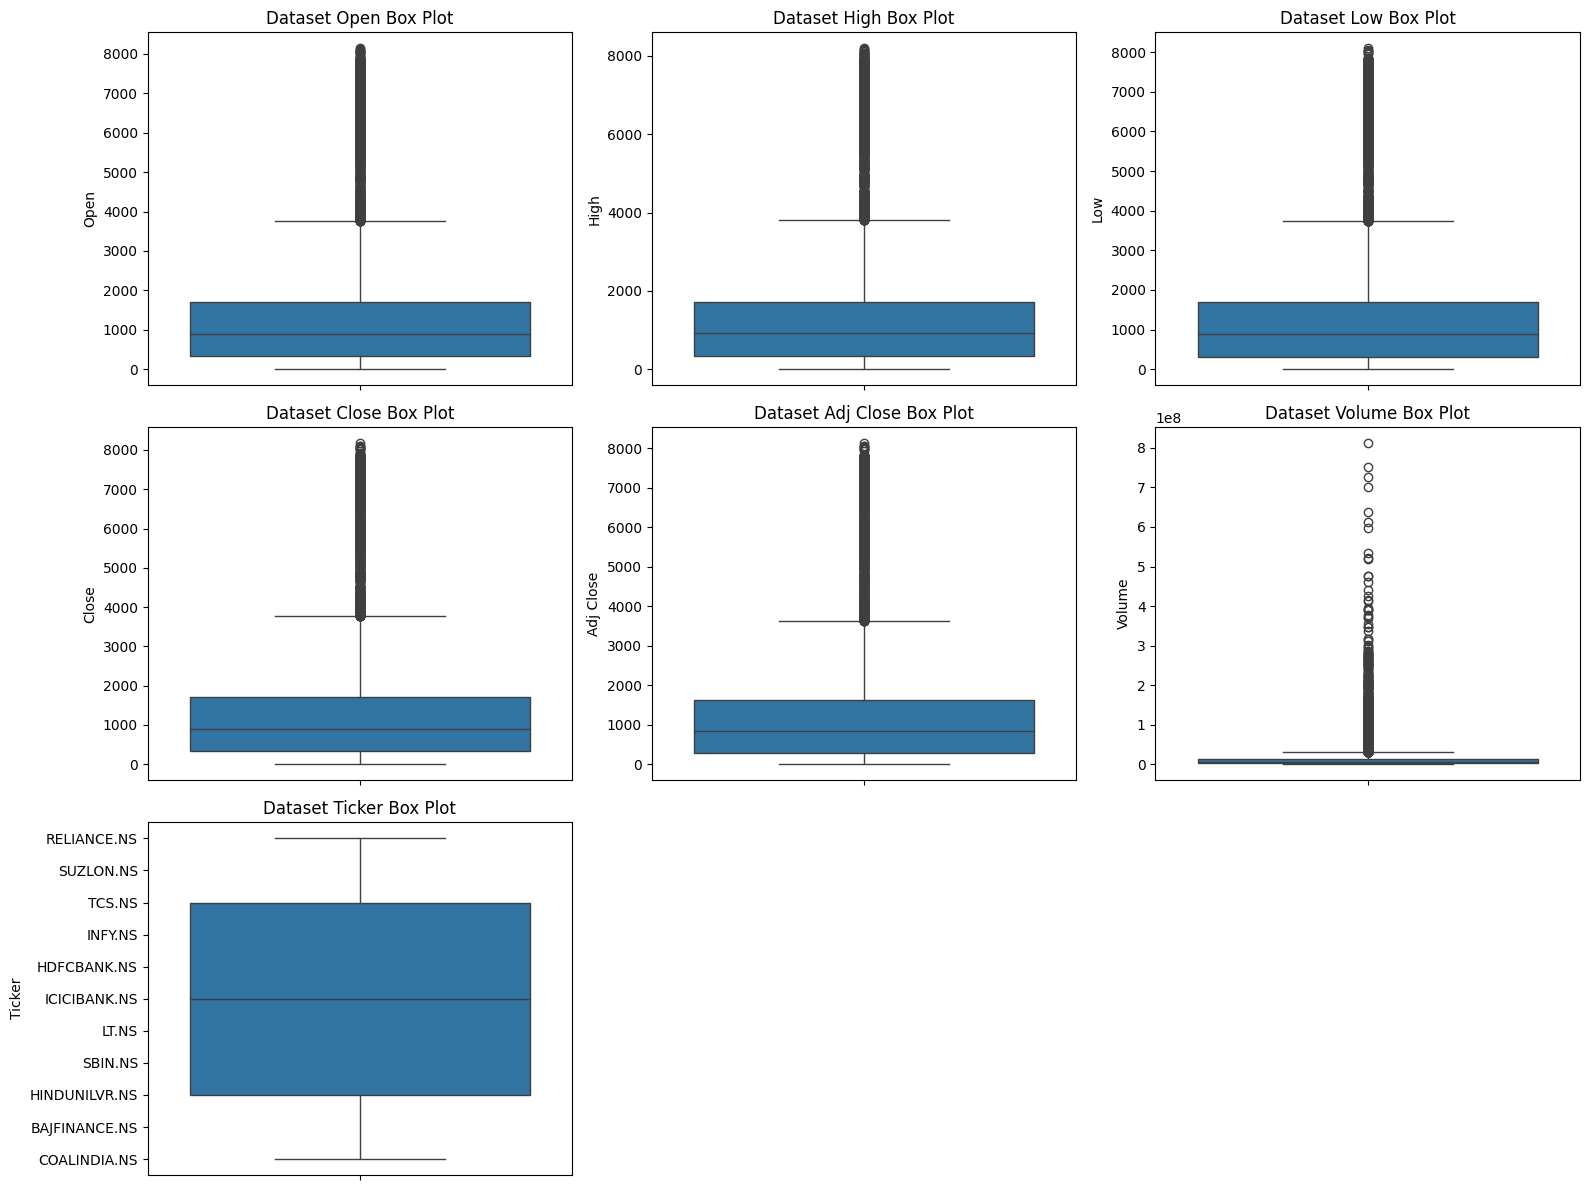

In [ ]:
plt.figure(figsize=(16, 12))

for i, df in enumerate(merged_data):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(merged_data[df])
    plt.title(f'Dataset {df} Box Plot')

plt.tight_layout()
plt.show()

In [ ]:
# def remove_outliers(df):
#     df_cleaned = df.copy()
#     for column in df.select_dtypes(include='number').columns: # Select only numeric columns
#         Q1 = df_cleaned[column].quantile(0.25)
#         Q3 = df_cleaned[column].quantile(0.75)
#         IQR = Q3 - Q1
#         lower_bound = Q1 - 1.5 * IQR
#         upper_bound = Q3 + 1.5 * IQR

#         # Remove outliers
#         df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]


def cap_outliers(df):
    df_capped = df.copy()
    for column in df.select_dtypes(include='number').columns:
        Q1 = df_capped[column].quantile(0.25)
        Q3 = df_capped[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Cap outliers
        df_capped[column] = df_capped[column].clip(lower=lower_bound, upper=upper_bound)

    return df_capped

In [ ]:
def impute_outliers(df):
    df_imputed = df.copy()
    for column in df.select_dtypes(include='number').columns:
        Q1 = df_imputed[column].quantile(0.25)
        Q3 = df_imputed[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df_imputed[column] = df_imputed[column].apply(lambda x: df_imputed[column].mean() if x < lower_bound or x > upper_bound else x)

    return df_imputed


In [ ]:
import numpy as np

def transform_outliers(df):
    df_transformed = df.copy()
    for column in df.select_dtypes(include='number').columns:
        Q1 = df_transformed[column].quantile(0.25)
        Q3 = df_transformed[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df_transformed[column] = df_transformed[column].apply(lambda x: np.log(x) if x < lower_bound or x > upper_bound else x)

    return df_transformed


In [ ]:
data_cleaned1 = cap_outliers(merged_data)
data_cleaned2 = impute_outliers(merged_data)
data_cleaned3 = transform_outliers(merged_data)


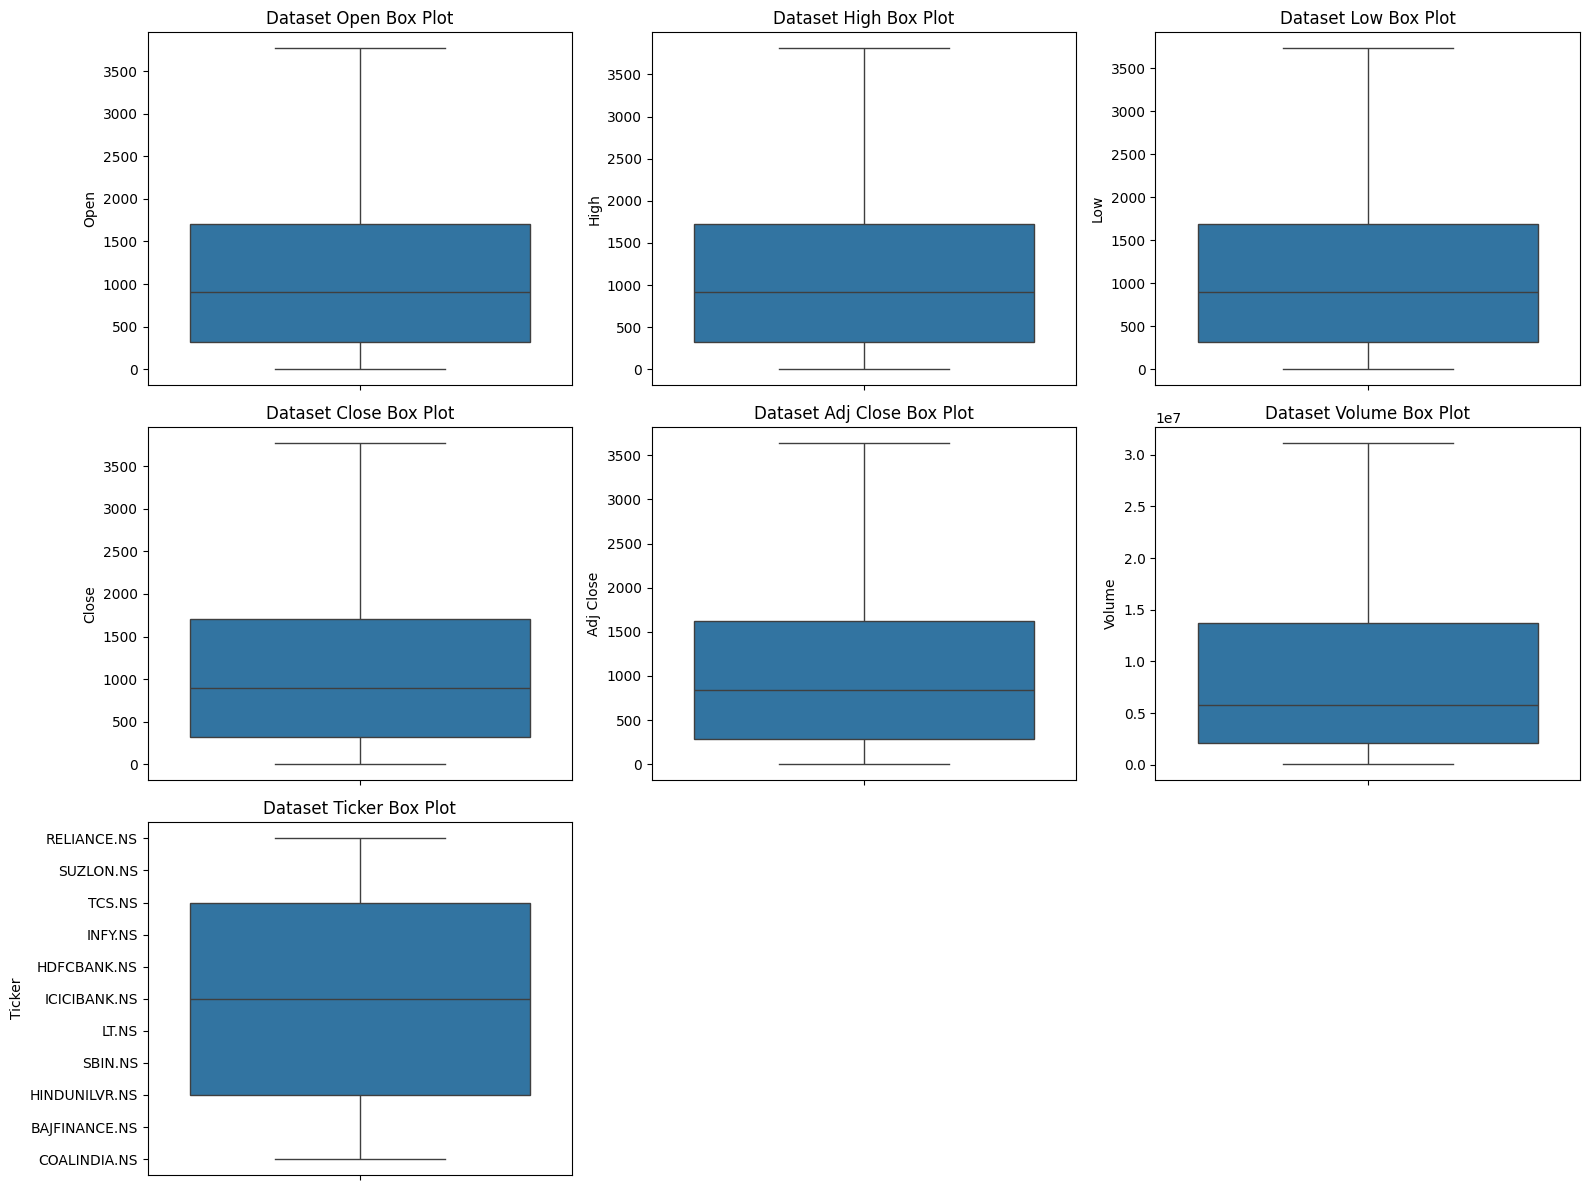

In [ ]:
plt.figure(figsize=(16, 12))

for i, df in enumerate(data_cleaned1):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data_cleaned1[df])
    plt.title(f'Dataset {df} Box Plot')

plt.tight_layout()
plt.show()

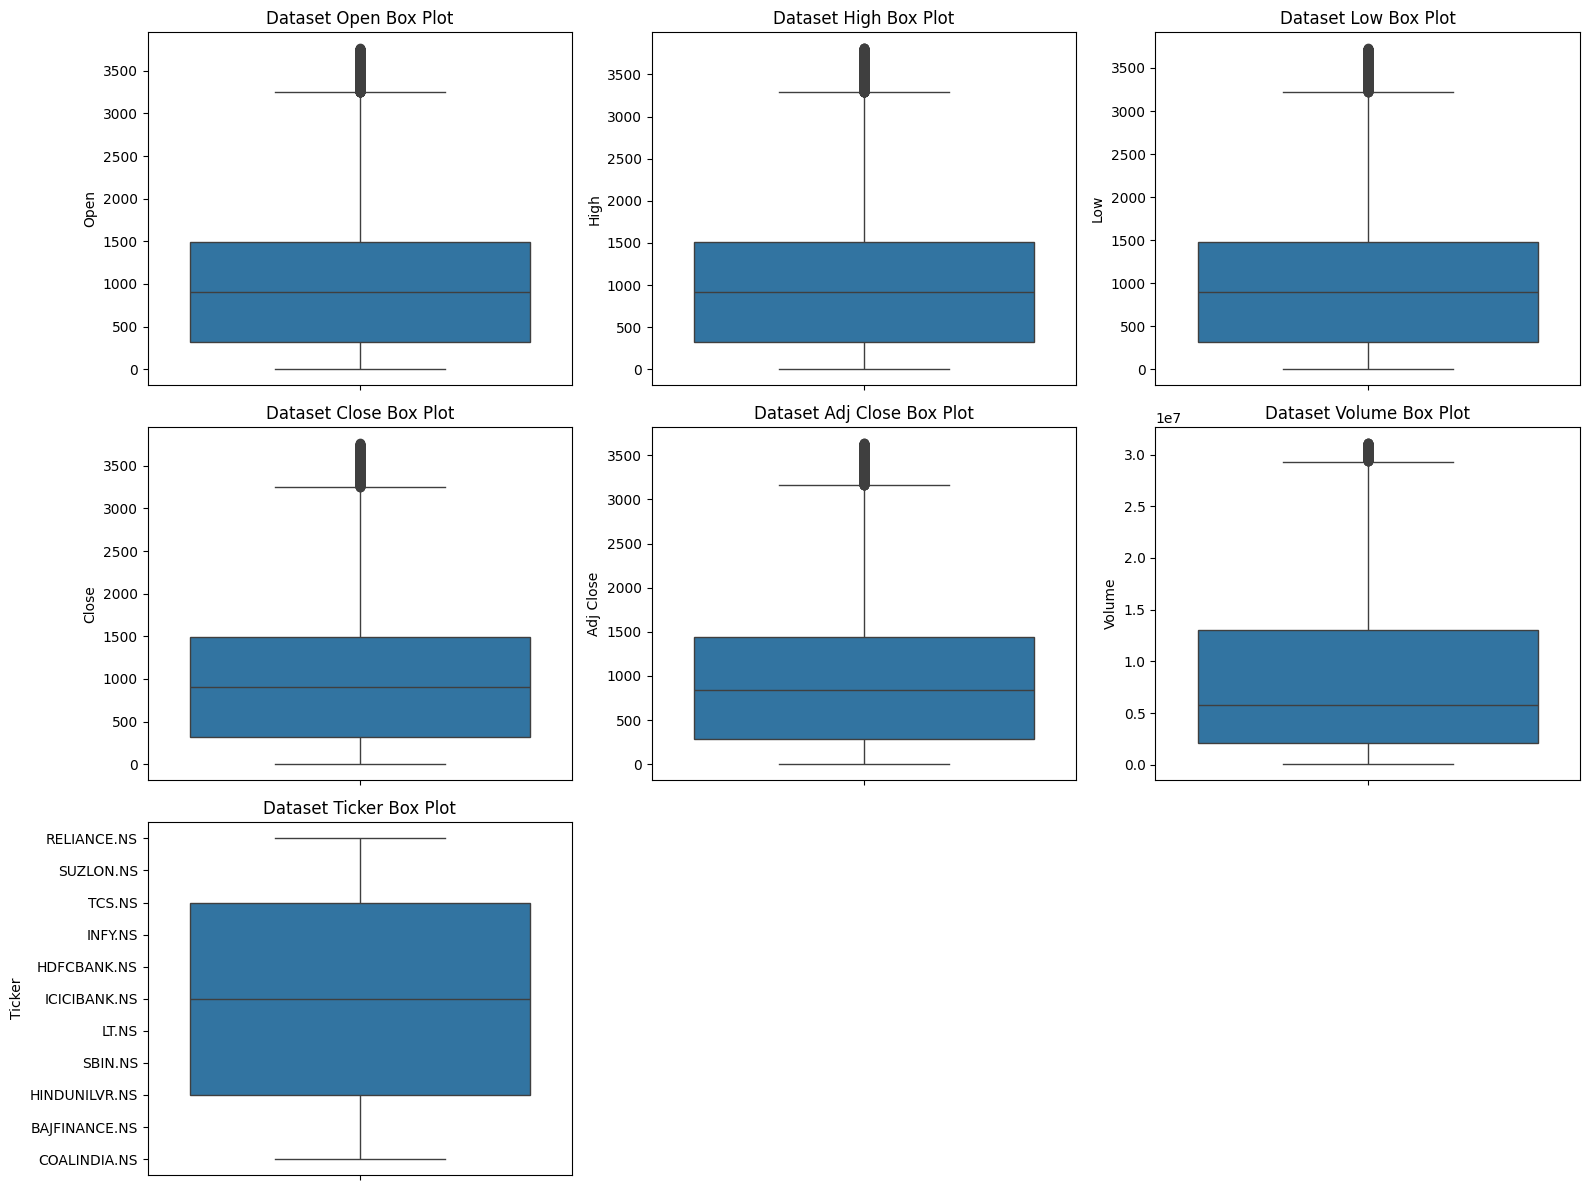

In [ ]:
plt.figure(figsize=(16, 12))

for i, df in enumerate(data_cleaned2):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data_cleaned2[df])
    plt.title(f'Dataset {df} Box Plot')

plt.tight_layout()
plt.show()

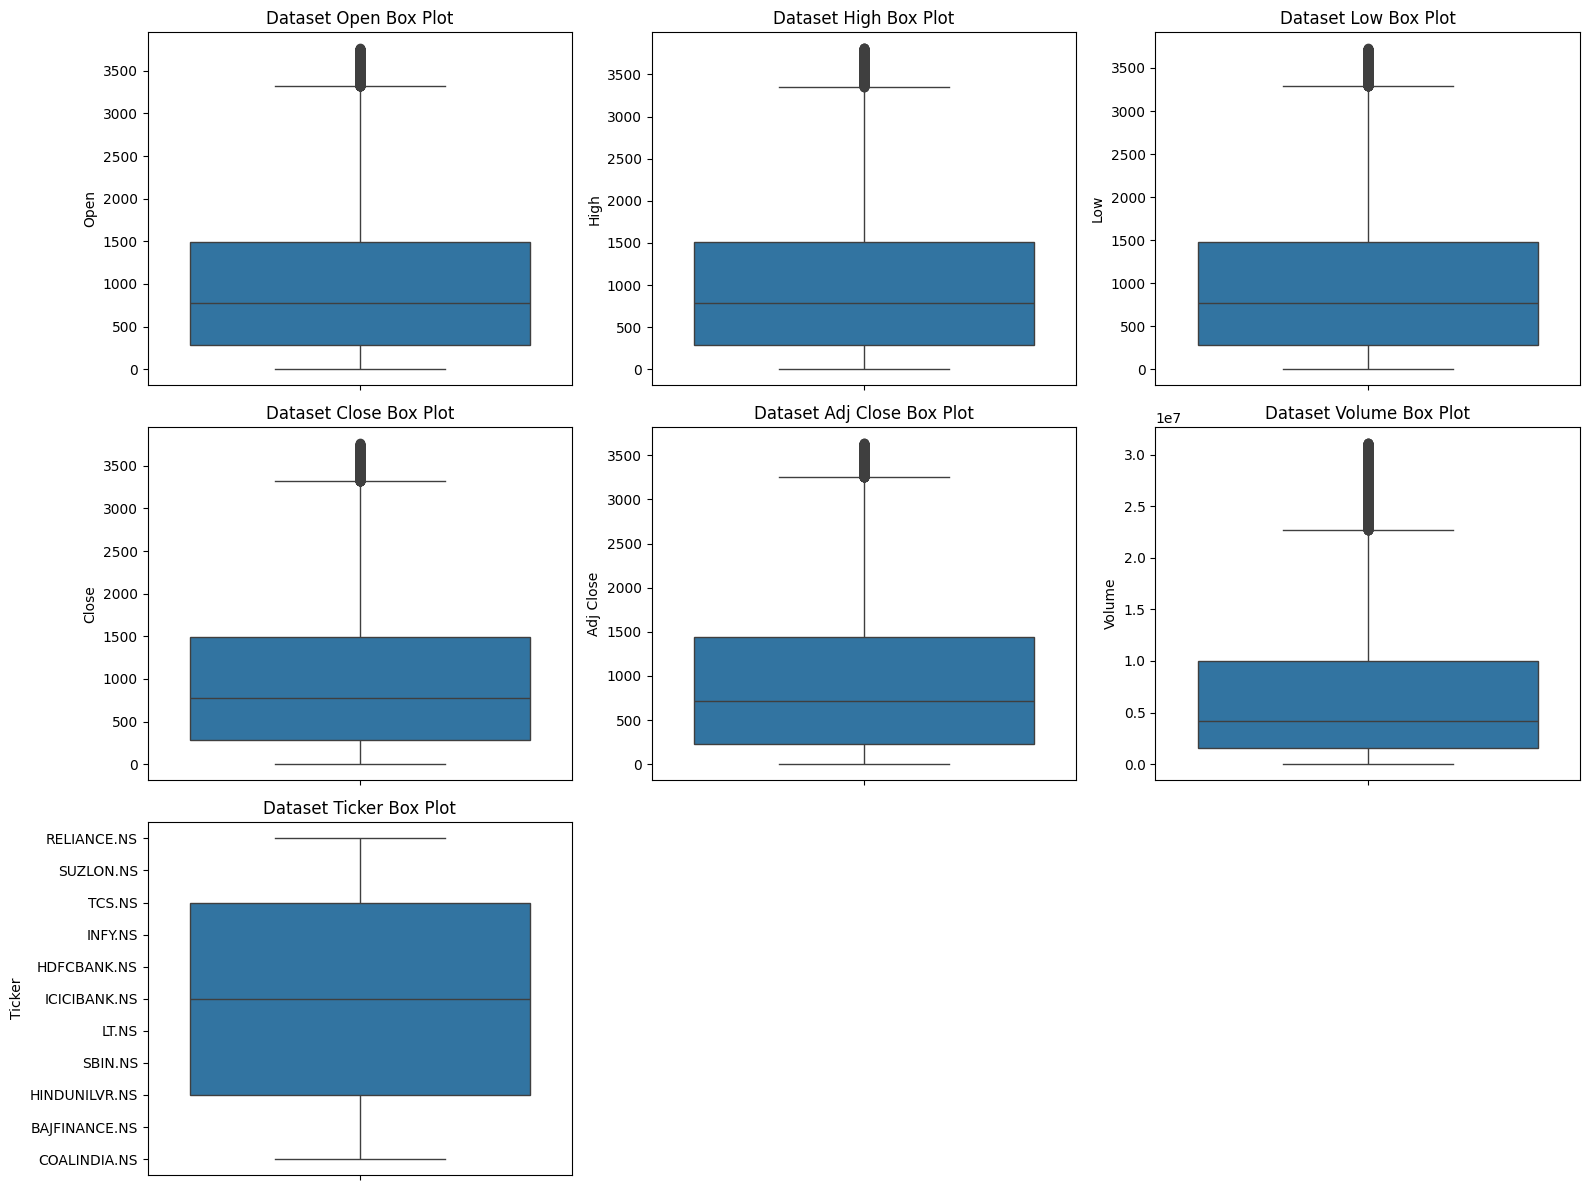

In [ ]:
plt.figure(figsize=(16, 12))

for i, df in enumerate(data_cleaned3):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data_cleaned3[df])
    plt.title(f'Dataset {df} Box Plot')

plt.tight_layout()
plt.show()

In [ ]:
x = data_cleaned1[['Open', 'High', 'Low', 'Volume','Ticker']]

In [ ]:
y = data_cleaned1['Close']

In [ ]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder


In [ ]:
label_encoder = LabelEncoder()
x['Ticker'] = label_encoder.fit_transform(x['Ticker'])


<ipython-input-90-ecca5fe1dea4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Ticker'] = label_encoder.fit_transform(x['Ticker'])


In [ ]:
x.head()

,Open,High,Low,Volume,Ticker
Date,,,,,
2015-01-01,405.186554,407.792389,403.975037,1481821.0,7
2015-01-02,406.009430,409.643921,404.272217,3665683.0,7
2015-01-05,404.592224,407.289520,399.609100,5051970.0,7
2015-01-06,397.734741,399.106232,380.362396,9313990.0,7
2015-01-07,382.693970,392.614471,382.648254,10360156.0,7


In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(x)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



In [ ]:
model1 = LinearRegression()
model1.fit(X_train, y_train)

LinearRegression()

In [ ]:
model1.score(X_train, y_train)

0.9999459325740361

In [ ]:
model1.score(X_test, y_test)

0.9999273627325396

In [ ]:
y_pred = model1.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 79.05555723897007


In [ ]:
def predict_stock_price(open_price, high_price, low_price, volume, ticker):
    ticker_encoded = label_encoder.transform([ticker])[0]
    input_data = np.array([[open_price, high_price, low_price, volume, ticker_encoded]])

    input_data_scaled = scaler.transform(input_data)

    predicted_price = model1.predict(input_data_scaled)
    return predicted_price[0]

if __name__ == "__main__":
    open_price = float(input("Enter the Open Price: ").replace(',', ''))
    high_price = float(input("Enter the High Price: ").replace(',', ''))
    low_price = float(input("Enter the Low Price: ").replace(',', ''))
    volume = float(input("Enter the Volume: ").replace(',', ''))
    ticker = input("Enter the Ticker Symbol: ")

    predicted_price = predict_stock_price(open_price, high_price, low_price, volume, ticker)
    print(f"Predicted Stock Price: {predicted_price:.2f}")

Enter the Open Price: 3,006.20
Enter the High Price: 3,074.00
Enter the Low Price: 2,988.00 
Enter the Volume: 19,116,670
Enter the Ticker Symbol: RELIANCE.NS
Predicted Stock Price: 3046.52


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
rf_model.score(X_train, y_train)

0.9999873457051989

In [ ]:
rf_model.score(X_test, y_test)

0.9998785569596511

In [ ]:
rf_test = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, rf_test)
print(f"Random Forest Regression MSE: {mse_rf}")

Random Forest Regression MSE: 132.17384908933488


In [ ]:
def predict_stock_price(open_price, high_price, low_price, volume, ticker):
    ticker_encoded = label_encoder.transform([ticker])[0]
    input_data = np.array([[open_price, high_price, low_price, volume, ticker_encoded]])

    input_data_scaled = scaler.transform(input_data)

    predicted_price = rf_model.predict(input_data_scaled)
    return predicted_price[0]

if __name__ == "__main__":
    open_price = float(input("Enter the Open Price: ").replace(',', ''))
    high_price = float(input("Enter the High Price: ").replace(',', ''))
    low_price = float(input("Enter the Low Price: ").replace(',', ''))
    volume = float(input("Enter the Volume: ").replace(',', ''))
    ticker = input("Enter the Ticker Symbol: ")

    predicted_price = predict_stock_price(open_price, high_price, low_price, volume, ticker)
    print(f"Predicted Stock Price: {predicted_price:.2f}")

Enter the Open Price: 3,006.20
Enter the High Price: 3,074.00
Enter the Low Price: 2,988.00 
Enter the Volume: 19,116,670
Enter the Ticker Symbol: RELIANCE.NS
Predicted Stock Price: 3038.75


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


**stacking**

In [ ]:
from sklearn.ensemble import RandomForestRegressor,StackingRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
base_models = [
    ('linear', LinearRegression()),
    ('ridge', Ridge()),
    ('lasso', Lasso()),
    ('svr', SVR(C=1.0, epsilon=0.1, gamma='scale')),
    ('knn', KNeighborsRegressor()),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('gbr', GradientBoostingRegressor(n_estimators=100, random_state=42))
]
meta_model = LinearRegression()

stacking_model = StackingRegressor(estimators=base_models, final_estimator=meta_model, cv=5)

stacking_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.645e+06, tolerance: 2.290e+06
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.019e+06, tolerance: 1.841e+06
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.941e+06, tolerance: 1.841e

StackingRegressor(cv=5,
                  estimators=[('linear', LinearRegression()),
                              ('ridge', Ridge()), ('lasso', Lasso()),
                              ('svr', SVR()), ('knn', KNeighborsRegressor()),
                              ('rf', RandomForestRegressor(random_state=42)),
                              ('gbr',
                               GradientBoostingRegressor(random_state=42))],
                  final_estimator=LinearRegression())

In [ ]:
y_pred_stacking = stacking_model.predict(X_test)
mse_stacking = mean_squared_error(y_test, y_pred_stacking)
print(f"Stacking Model MSE: {mse_stacking}")

Stacking Model MSE: 78.58036655257179


In [ ]:

results_df = pd.DataFrame({
    'Actual': y_test,
    'Stacking Prediction': y_pred_stacking
}).reset_index()

In [ ]:
results_df.head()

,Date,Actual,Stacking Prediction
0,2015-02-18,574.125000,569.176365
1,2019-11-28,1265.300049,1268.231039
2,2024-03-01,769.150024,768.604107
3,2021-09-16,463.700012,459.984022
4,2021-05-11,364.649994,362.489579


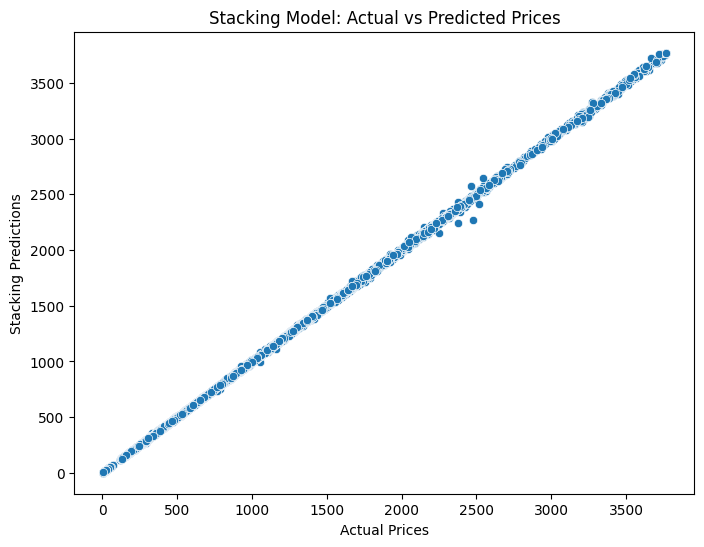

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=results_df['Actual'], y=results_df['Stacking Prediction'])
plt.xlabel('Actual Prices')
plt.ylabel('Stacking Predictions')
plt.title('Stacking Model: Actual vs Predicted Prices')
plt.show()

In [ ]:
merged_data.head()

,Open,High,Low,Close,Adj Close,Volume,Ticker
Date,,,,,,,
2015-01-01,405.186554,407.792389,403.975037,405.917999,381.517303,1481821,RELIANCE.NS
2015-01-02,406.009430,409.643921,404.272217,404.843658,380.507507,3665683,RELIANCE.NS
2015-01-05,404.592224,407.289520,399.609100,400.409149,376.339569,5051970,RELIANCE.NS
2015-01-06,397.734741,399.106232,380.362396,382.236786,359.259552,9313990,RELIANCE.NS
2015-01-07,382.693970,392.614471,382.648254,390.557220,367.079895,10360156,RELIANCE.NS


In [ ]:
def predict_stock_price(open_price, high_price, low_price, volume, ticker):
    ticker_encoded = label_encoder.transform([ticker])[0]
    input_data = np.array([[open_price, high_price, low_price, volume, ticker_encoded]])

    input_data_scaled = scaler.transform(input_data)

    predicted_price = stacking_model.predict(input_data_scaled)
    return predicted_price[0]

if __name__ == "__main__":
    open_price = float(input("Enter the Open Price: ").replace(',', ''))
    high_price = float(input("Enter the High Price: ").replace(',', ''))
    low_price = float(input("Enter the Low Price: ").replace(',', ''))
    volume = float(input("Enter the Volume: ").replace(',', ''))
    ticker = input("Enter the Ticker Symbol: ")

    predicted_price = predict_stock_price(open_price, high_price, low_price, volume, ticker)
    print(f"Predicted Stock Price: {predicted_price:.2f}")

Enter the Open Price: 3,006.20
Enter the High Price: 3,074.00
Enter the Low Price: 2,988.00 
Enter the Volume: 19,116,670
Enter the Ticker Symbol: RELIANCE.NS
Predicted Stock Price: 3043.98


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
